# Exercise 1

In [21]:
import numpy as np
from autograd import grad
from typing import List
import matplotlib.pyplot as plt


# gradient descent function - inputs: g (input function), 
# alpha (steplength parameter), 
# max_its (maximum number of iterations), w (initialization)
def ma_gradient_descent(g,alpha,max_its,w, beta):
    # compute gradient module using autograd
    gradient = grad(g)
    d = -gradient(w)

    # run the gradient descent loop
    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    for k in range(max_its):
        # take gradient descent step
        w = w + alpha * d
        grad_eval = gradient(w)
        
        d = beta * d + (1 - beta) * (-grad_eval)
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [22]:
C = np.array([[0.5,0],[0,9.75]])
g = lambda w: (np.dot(np.dot(w.T,C),w))
w = np.array([10.0, 1.0])
a = 0.1
max_its = 25
betas = [0.0, 0.1, 0.7]  

In [23]:
# from autograd import value_and_grad
# gradient = value_and_grad(g)
# cost_eval,grad_eval = gradient(w)

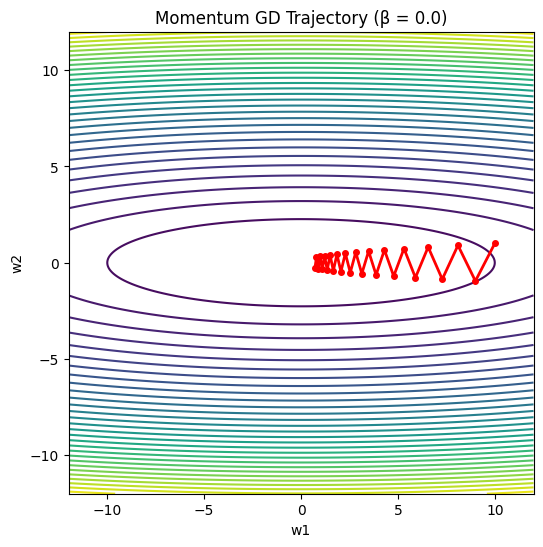

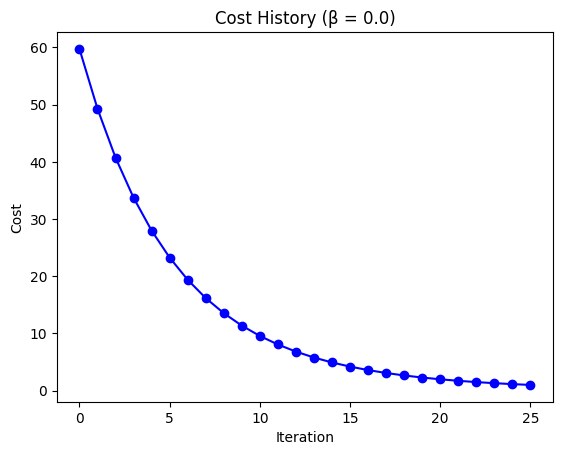

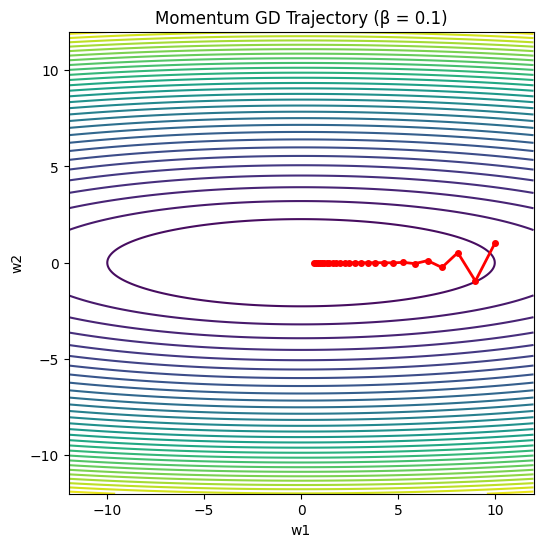

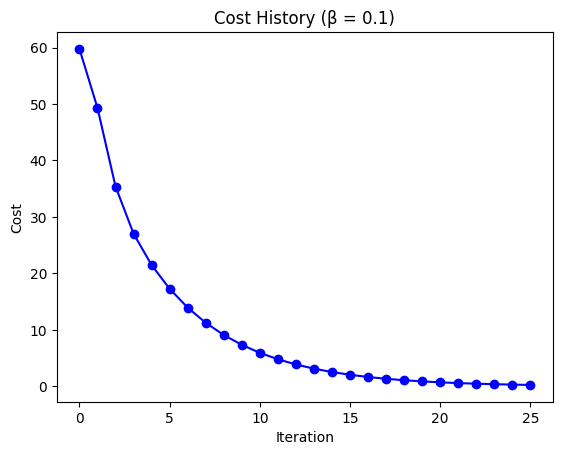

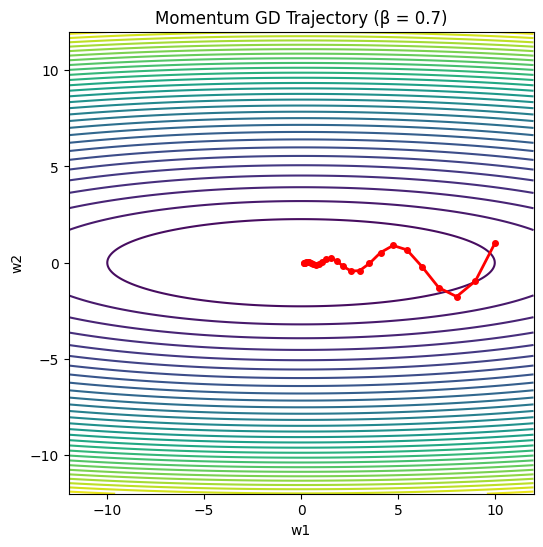

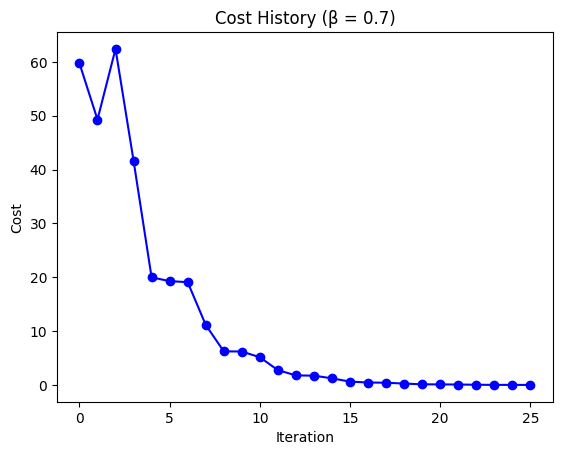

In [24]:
def run_one_point_two(beta):
    weight_history, cost_history = ma_gradient_descent(
        g,
        a,
        max_its,
        w,
        beta
    )

    return np.array(weight_history), np.array(cost_history)



import matplotlib.pyplot as plt

def contour_plot(beta):
    w1 = np.linspace(-12, 12, 400)
    w2 = np.linspace(-12, 12, 400)
    W1, W2 = np.meshgrid(w1, w2)

    Z = 0.5 * W1**2 + 9.75 * W2**2

    plt.figure(figsize=(6, 6))
    plt.contour(W1, W2, Z, levels=30)
    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.title(f"Momentum GD Trajectory (β = {beta})")

    weight_history, _ = run_one_point_two(beta)

    plt.plot(
        weight_history[:, 0],
        weight_history[:, 1],
        'ro-',
        linewidth=2,
        markersize=4
    )

    plt.show()
    

def cost_plot(beta):
    _, cost_history = run_one_point_two(beta)

    plt.figure()
    plt.plot(cost_history, 'b-o')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost History (β = {beta})")
    plt.show()


for beta in betas:
    contour_plot(beta)
    cost_plot(beta)

    

# Exercise 2

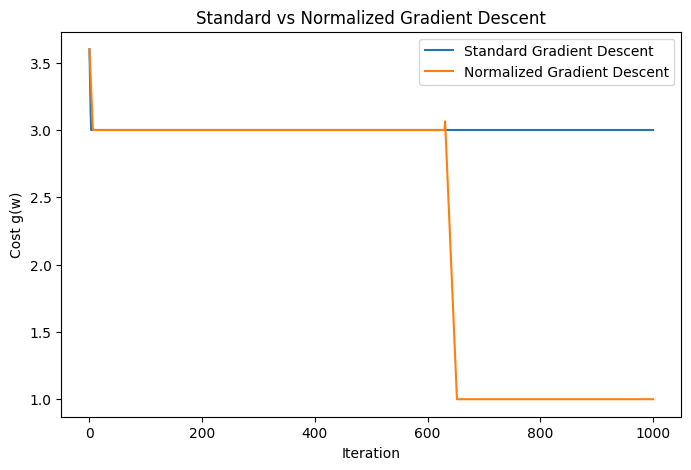

In [25]:
import autograd.numpy as np
from autograd import grad
from typing import List
import matplotlib.pyplot as plt

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return cost_history,weight_history


def normalized_gradient_descent(g, alpha, max_its, w0, eps=1e-8):
    gradient = grad(g)

    w = w0
    weight_history = [w]
    cost_history = [g(w)]

    for k in range(max_its):
        grad_eval = gradient(w)
        grad_norm_sq = np.linalg.norm(grad_eval)**2

        w = w - (alpha / (grad_norm_sq + eps)) * grad_eval

        weight_history.append(w)
        cost_history.append(g(w))

    return cost_history, weight_history

g = lambda w: np.tanh(4 * w[0] + 4 * w[1]) + np.maximum(1, 0.4 * w[0]**2) + 1
w0 = np.array([2.0, 2.0])
a = 0.1 
max_its = 1000


cost_history, weight_history = gradient_descent(g, a, max_its, w0)
cost_history_norm, weight_history_norm = normalized_gradient_descent(g, a, max_its, w0)

plt.figure(figsize=(8, 5))
plt.plot(cost_history, label="Standard Gradient Descent")
plt.plot(cost_history_norm, label="Normalized Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost g(w)")
plt.title("Standard vs Normalized Gradient Descent")
plt.legend()
plt.show()



# Exercise 3

In [43]:
import pandas as pd
# import the dataset
csvname = 'student_debt_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))

x = data[:,0]
x.shape = (len(x), 1)

o = np.ones((len(x), 1))
x_new = np.concatenate((o, x), axis=1)

y = data[:,1]

A = x_new.T @ x_new
b = x_new.T @ y



In [44]:
# extract input
# x = data[:,0]
# y = data[:,1]

In [45]:
w = np.linalg.pinv(A) @ b

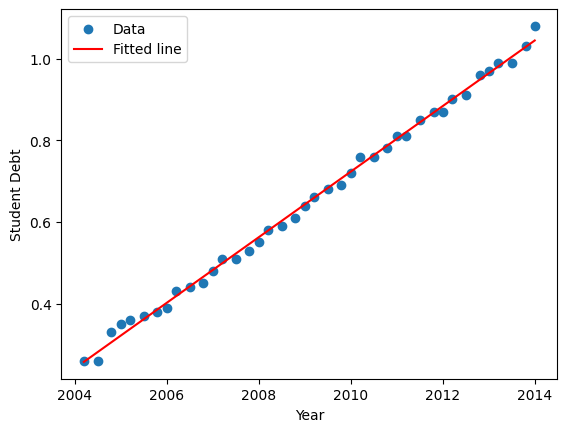

3.936011966509824


In [46]:

plt.scatter(x, y, label='Data')

x_line = np.linspace(x.min(), x.max(), 100)
y_line = w[0] + w[1] * x_line

plt.plot(x_line, y_line, color='red', label='Fitted line')
plt.xlabel('Year')
plt.ylabel('Student Debt')
plt.legend()
plt.show()


prediction_2050 = w[0] + w[1] * 2050
print(prediction_2050)

# Exercise 4

In [ ]:
# import the dataset. Note you need to take the log of the imported data
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:] 

In [ ]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history